# K-means (Practice)

Neste exercício vamos usar a base [online shoppers purchase intention](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset) de Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018). [Web Link](https://doi.org/10.1007/s00521-018-3523-0).

A base trata de registros de 12.330 sessões de acesso a páginas, cada sessão sendo de um único usuário em um período de 12 meses, para posteriormente estudarmos a relação entre o design da página e o perfil do cliente - "Será que clientes com comportamento de navegação diferentes possuem propensão a compra diferente?" 

Nosso objetivo é tentar agrupar os clientes conforme seu comportamento de navegação entre páginas administrativas, informativas e de produtos. 

As variáveis estão descritas abaixo (em tradução livre do link indicado).

Por este motivo, o escopo desta análise estará fechado nas primeiras seis variáveis da tabela, referentes a quantidade e tempo de acesso por tipo de página, atributos que falam mais do comportamento de navegação do cliente que de características da página ou da época do ano.

|Variavel                |Descrição          | 
|------------------------|:-------------------| 
|Administrative          | Quantidade de acessos em páginas administrativas| 
|Administrative_Duration | Tempo de acesso em páginas administrativas | 
|Informational           | Quantidade de acessos em páginas informativas  | 
|Informational_Duration  | Tempo de acesso em páginas informativas  | 
|ProductRelated          | Quantidade de acessos em páginas de produtos | 
|ProductRelated_Duration | Tempo de acesso em páginas de produtos | 
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  | 
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações | 
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico | 
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) | 
|Month                   | Mês  | 
|OperatingSystems        | Sistema operacional do visitante | 
|Browser                 | Browser do visitante | 
|Region                  | Região | 
|TrafficType             | Tipo de tráfego                  | 
|VisitorType             | Tipo de visitante: novo ou recorrente | 
|Weekend                 | Indica final de semana | 
|Revenue                 | Indica se houve compra ou não |

\* variávels calculadas pelo google analytics

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from tqdm import tqdm

In [6]:
df_full = pd.read_csv('shoppers_intention.csv')
print(df_full.shape)
df_full.head()

(12330, 18)


Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   BounceRates  ExitRates  PageValues  SpecialDay Month  OperatingSystems  \
0         0.20       0.20         0.0         0.0   Feb                 1   
1         0.00       0.10         0.0         0.0   Feb                 2   
2         0.20       0.20         0.0         0.0   Feb                 4   
3         0.05       0.14         0.0         0.0   Feb                 3   
4         0.02       0.05         0.0         0.0   Feb                 3   

   Browser  Region  TrafficType        VisitorType  Weekend  Revenue  
0        1       1            1  Returning_Visitor    False    False  
1        2       1            2  Returning_Visitor    False    False  
2        1       9            3  Returning_Visitor    False    False  
3        2       2            4  Returning_Visitor    False    False  
4        3       1            4  Returning_Visitor     True    False

In [7]:
df_full.Revenue.value_counts(dropna=False)

Revenue
False    10422
True      1908
Name: count, dtype: int64

In [8]:
df_full.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [9]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

## Análise descritiva

Faça uma análise descritiva das variáveis do escopo.

- Verifique a distribuição dessas variáveis
- Veja se há valores *missing* e caso haja, decida o que fazer
- Faça mais algum tratamento nas variáveis caso ache pertinente

In [11]:
# Selecionando as variáveis de interesse

df = df_full[['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration']].copy()
df.head()

Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  
0                     0.0               1                 0.000000  
1                     0.0               2                64.000000  
2                     0.0               1                 0.000000  
3                     0.0               2                 2.666667  
4                     0.0              10               627.500000

In [12]:
df.describe().T

count         mean          std  min       25%  \
Administrative           12330.0     2.315166     3.321784  0.0    0.0000   
Administrative_Duration  12330.0    80.818611   176.779107  0.0    0.0000   
Informational            12330.0     0.503569     1.270156  0.0    0.0000   
Informational_Duration   12330.0    34.472398   140.749294  0.0    0.0000   
ProductRelated           12330.0    31.731468    44.475503  0.0    7.0000   
ProductRelated_Duration  12330.0  1194.746220  1913.669288  0.0  184.1375   

                                50%          75%          max  
Administrative             1.000000     4.000000     27.00000  
Administrative_Duration    7.500000    93.256250   3398.75000  
Informational              0.000000     0.000000     24.00000  
Informational_Duration     0.000000     0.000000   2549.37500  
ProductRelated            18.000000    38.000000    705.00000  
ProductRelated_Duration  598.936905  1464.157214  63973.52223

Olhando um `pairplot` de todas as variáveis consideradas nos dados.

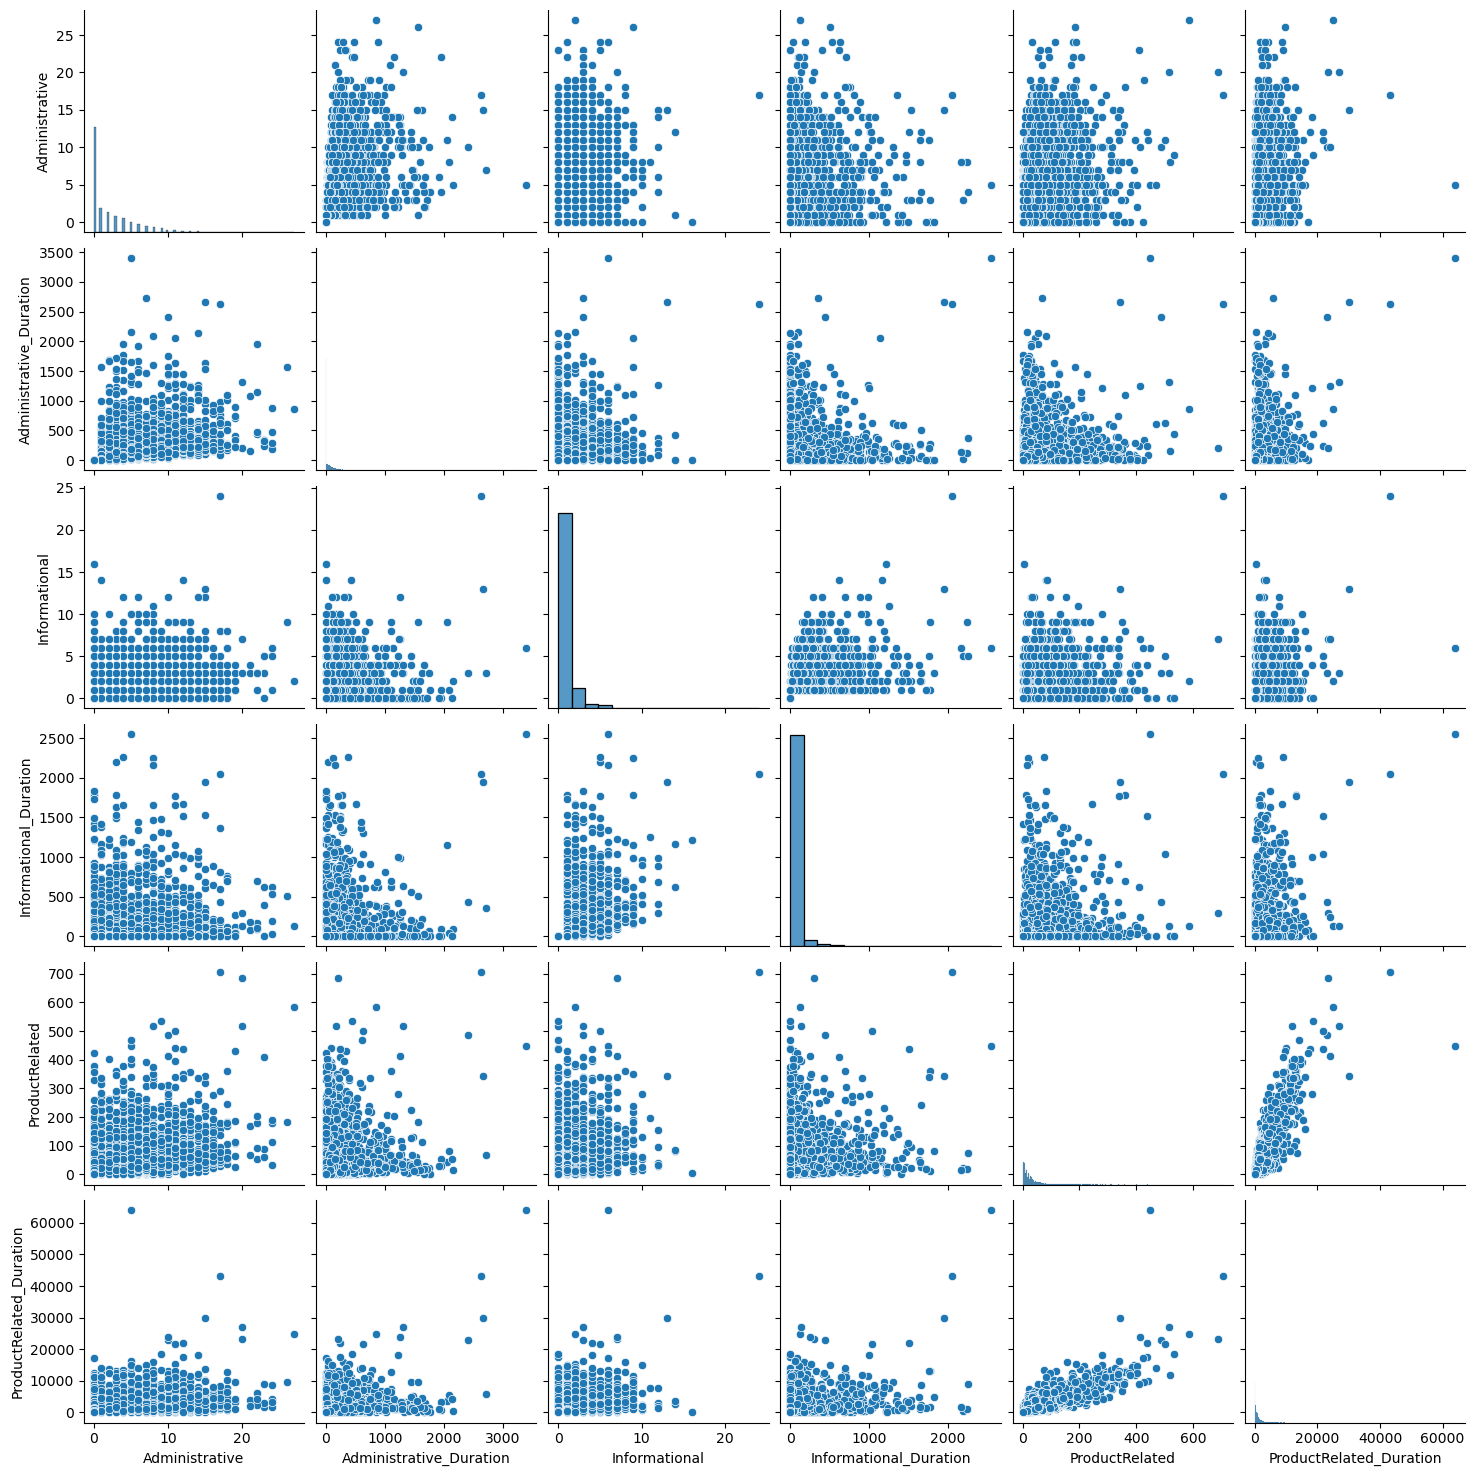

In [14]:
sns.pairplot(df)
plt.show()

**Dados faltantes**

In [16]:
df.isna().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
dtype: int64

Não há dados faltantes no conjunto análisado.

##### Como podemos notar nas análises acima há uma discrepância grande na escala da variabilidade dos dados.

- Vamos padronizar os dados utilizando `StandardScaler`, deixando-os com a mesma "importância"

In [19]:
padronizador = StandardScaler()
df_pad = padronizador.fit_transform(df)

In [20]:
df_pad = pd.DataFrame(df_pad, columns=df.columns)
df_pad

Administrative  Administrative_Duration  Informational  \
0           -0.696993                -0.457191      -0.396478   
1           -0.696993                -0.457191      -0.396478   
2           -0.696993                -0.457191      -0.396478   
3           -0.696993                -0.457191      -0.396478   
4           -0.696993                -0.457191      -0.396478   
...               ...                      ...            ...   
12325        0.206173                 0.363075      -0.396478   
12326       -0.696993                -0.457191      -0.396478   
12327       -0.696993                -0.457191      -0.396478   
12328        0.507228                -0.032916      -0.396478   
12329       -0.696993                -0.457191      -0.396478   

       Informational_Duration  ProductRelated  ProductRelated_Duration  
0                   -0.244931       -0.691003                -0.624348  
1                   -0.244931       -0.668518                -0.590903  
2                   -0.244931       -0.691003                -0.624348  
3                   -0.244931       -0.668518                -0.622954  
4                   -0.244931       -0.488636                -0.296430  
...                       ...             ...                      ...  
12325               -0.244931        0.478227                 0.307822  
12326               -0.244931       -0.601062                -0.380957  
12327               -0.244931       -0.578577                -0.528063  
12328               -0.244931       -0.376210                -0.443536  
12329               -0.244931       -0.646033                -0.613243  

[12330 rows x 6 columns]

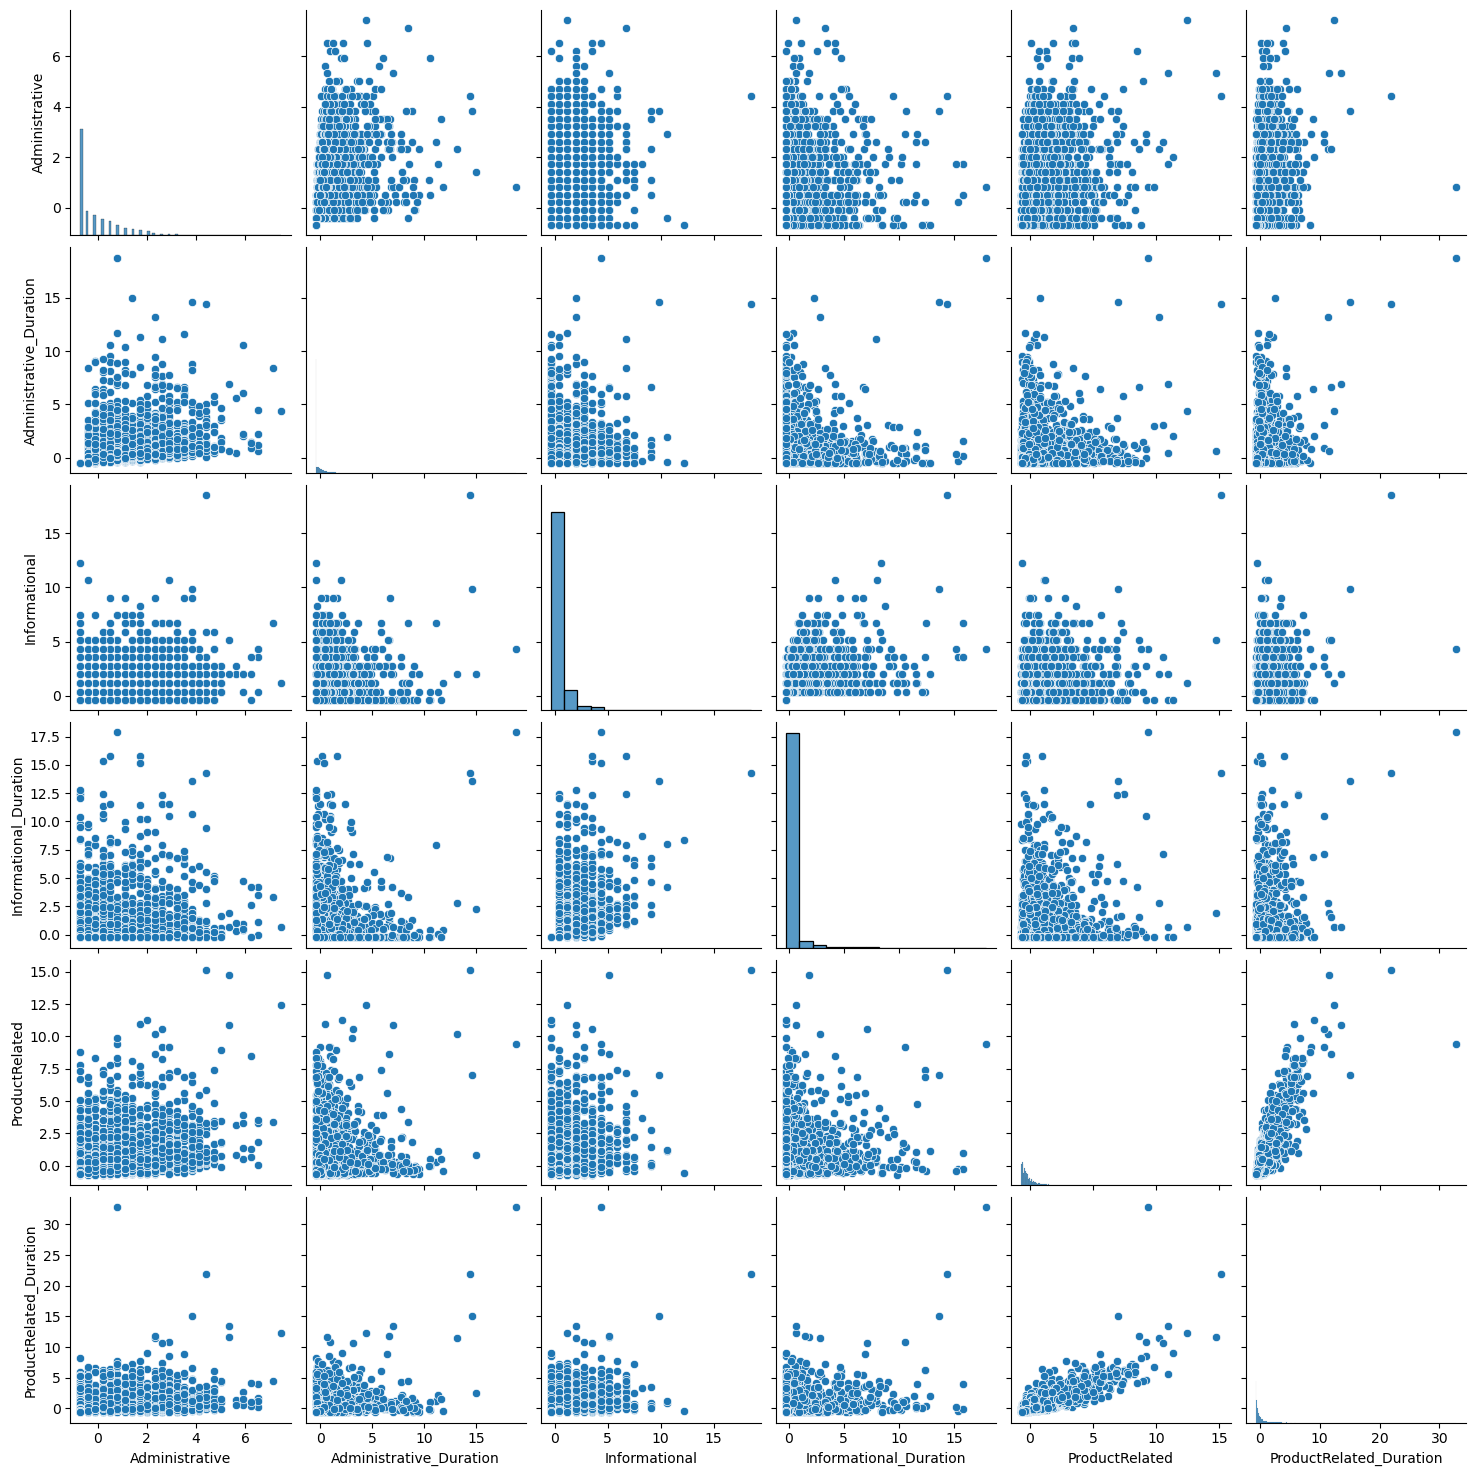

In [21]:
sns.pairplot(df_pad)
plt.show()

## Número de grupos

Utilize as técnicas vistas em aula que te ajudem a decidir pelo número de grupos a ser utilizados.

In [23]:
# as variaveis 
variables = list(df_pad.columns[:6])

variables

['Administrative',
 'Administrative_Duration',
 'Informational',
 'Informational_Duration',
 'ProductRelated',
 'ProductRelated_Duration']

##### Utilizando o método do cotovelo

In [348]:
# Definindo uma lista da soma dos quadrados da distância (do centróide)
SQD = []
# Lista do número de clusters
K = range(1,15)
for k in tqdm(K):
    km = KMeans(n_clusters=k)
    km.fit(df_pad[variables])
    SQD.append(km.inertia_) # O atributo inertia retorna a soma dos quadrados das distâncias

100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 47.50it/s]


In [26]:
SQD

[73980.00000000006,
 51210.55819891574,
 43203.30655357195,
 37326.422396561386,
 33649.81430547817,
 29688.078790504034,
 26740.0508873042,
 24162.159417177227,
 22494.438407964037,
 21094.007042634392,
 20263.952839061192,
 19033.70721287327,
 18440.827153651204,
 17542.53825867096]

num_clusters           SQD
0              1  73980.000000
1              2  51210.558199
2              3  43203.306554
3              4  37326.422397
4              5  33649.814305
5              6  29688.078791
6              7  26740.050887
7              8  24162.159417
8              9  22494.438408
9             10  21094.007043
10            11  20263.952839
11            12  19033.707213
12            13  18440.827154
13            14  17542.538259

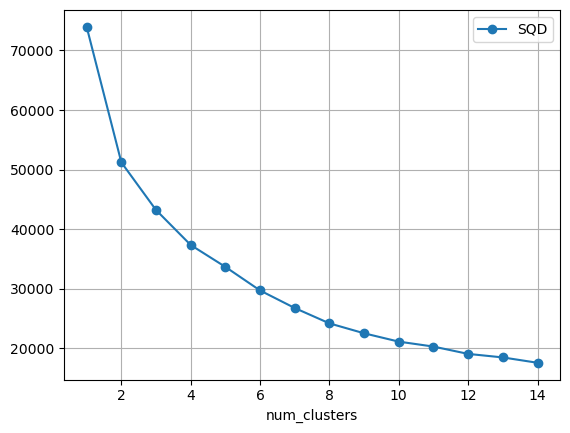

In [27]:
# Dadaframe e plot
df_cotovelo = pd.DataFrame({'num_clusters': list(range(1, len(SQD)+1)), 'SQD': SQD})
#Plot
df_cotovelo.plot(x='num_clusters', y='SQD', marker='o')
plt.grid()
df_cotovelo

Pelo método do cotovelo o número de clusters ideal seria o 2.

##### Utilizando o método da silhueta 
- Utilizaremos a função `silhouette_score`

In [30]:
# Uma lista vazia para ser preenchida com as silhuetas
silhuetas = []
# número máximo de clusters
max_clusters = 15

# Um loop para varrer todos os clusters
for n_clusters in tqdm(range(2, max_clusters+1)):
    # Aplicando o K-means
    km = KMeans(n_clusters=n_clusters).fit(df_pad[variables])
    # Obtendo os valores das silhuetas e armazenando na lista
    silhuetas.append(silhouette_score(df_pad[variables], km.labels_))
    # Montando um list comprehension para os nomes dos grupos
    nomes_grupos = ['grupo_'+str(g) for g in range(n_clusters)]
    # Adicionando ao dataframe 
    df_pad['com_'+str(n_clusters)+'_grupos'] = pd.Categorical.from_codes(km.labels_, categories=nomes_grupos)

100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:31<00:00,  2.27s/it]


In [31]:
df_pad.head()

Administrative  Administrative_Duration  Informational  \
0       -0.696993                -0.457191      -0.396478   
1       -0.696993                -0.457191      -0.396478   
2       -0.696993                -0.457191      -0.396478   
3       -0.696993                -0.457191      -0.396478   
4       -0.696993                -0.457191      -0.396478   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0               -0.244931       -0.691003                -0.624348   
1               -0.244931       -0.668518                -0.590903   
2               -0.244931       -0.691003                -0.624348   
3               -0.244931       -0.668518                -0.622954   
4               -0.244931       -0.488636                -0.296430   

  com_2_grupos com_3_grupos com_4_grupos com_5_grupos com_6_grupos  \
0      grupo_1      grupo_2      grupo_0      grupo_0      grupo_2   
1      grupo_1      grupo_2      grupo_0      grupo_0      grupo_2   
2      grupo_1      grupo_2      grupo_0      grupo_0      grupo_2   
3      grupo_1      grupo_2      grupo_0      grupo_0      grupo_2   
4      grupo_1      grupo_2      grupo_0      grupo_0      grupo_2   

  com_7_grupos com_8_grupos com_9_grupos com_10_grupos com_11_grupos  \
0      grupo_1      grupo_0      grupo_1       grupo_0       grupo_0   
1      grupo_1      grupo_0      grupo_1       grupo_0       grupo_0   
2      grupo_1      grupo_0      grupo_1       grupo_0       grupo_0   
3      grupo_1      grupo_0      grupo_1       grupo_0       grupo_0   
4      grupo_1      grupo_0      grupo_1       grupo_0       grupo_0   

  com_12_grupos com_13_grupos com_14_grupos com_15_grupos  
0      grupo_11       grupo_0       grupo_1       grupo_9  
1      grupo_11       grupo_0       grupo_1       grupo_9  
2      grupo_11       grupo_0       grupo_1       grupo_9  
3      grupo_11       grupo_0       grupo_1       grupo_9  
4      grupo_11       grupo_0       grupo_1       grupo_9

n_clusters  silhuetas
0            2   0.622424
1            3   0.504676
2            4   0.502355
3            5   0.506233
4            6   0.470627
5            7   0.459362
6            8   0.474458
7            9   0.476308
8           10   0.405622
9           11   0.377531
10          12   0.381757
11          13   0.402613
12          14   0.408303
13          15   0.345004

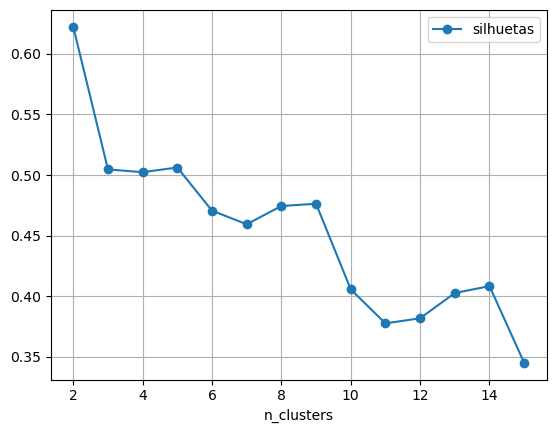

In [32]:
# Gerando o gráfico da silhueta média
df_silhueta = pd.DataFrame({'n_clusters': range(2, max_clusters+1),
                           'silhuetas': silhuetas})

#Plot
df_silhueta.plot(x='n_clusters', y='silhuetas', marker='o')
plt.grid()

df_silhueta

De acordo com o método da silhueta o melhor número de clusters seria 2, assim como no método do cotovelo.

Porém, dependendo da situação e da análise em questão, considerar o número de clusters igual a 3 e 4 podem ser relevantes. Iremos analisar esse ponto na próxima seção.

## Avaliação dos grupos

Faça uma análise descritiva para pelo menos duas soluções de agrupamentos (duas quantidades diferentes de grupos) sugeridas no item anterior, utilizando as variáveis que estão no escopo do agrupamento.
- Com base nesta análise e nas análises anteriores, decida pelo agrupamento final. 
- Se puder, sugira nomes para os grupos.

#### Descritiva seguindo o método do cotovelo e silhueta

- Vamos avaliar para o n_clusters=2, como sugerem os métodos
- Consideraremos também n_clusters=3 e 4.

##### Para n_clusters = 2

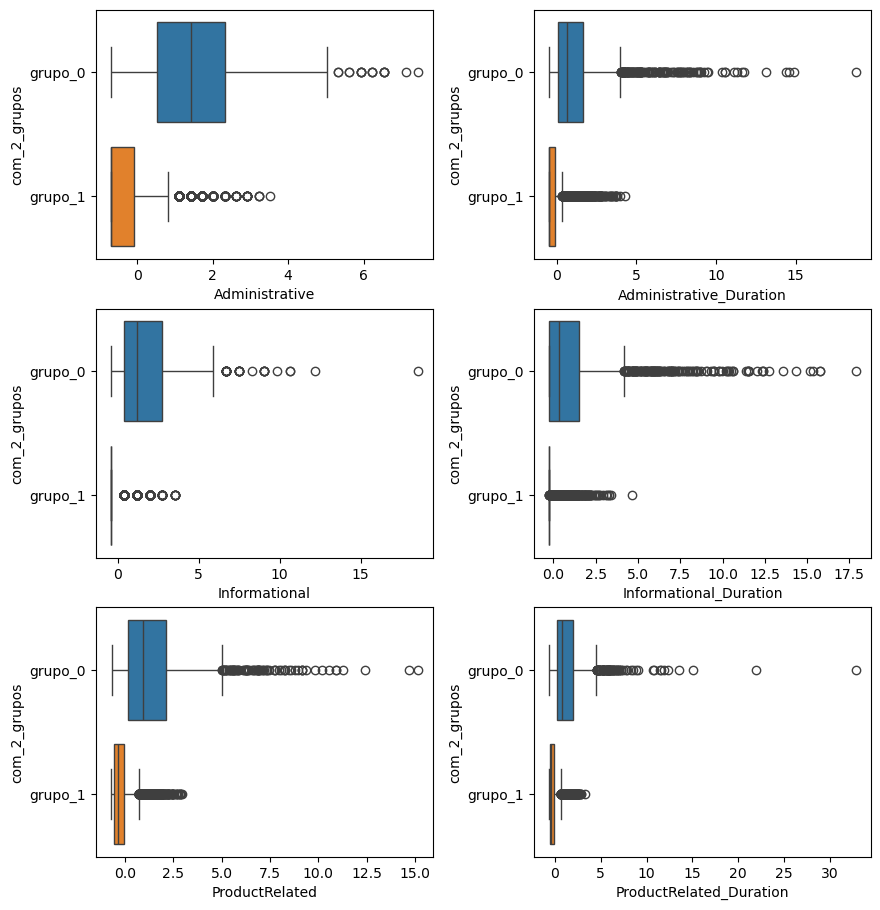

In [37]:
vars = list(df_pad.columns)

fig = plt.figure(figsize=[10, 11])

ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)

sns.boxplot(data=df_pad, x=vars[0], y='com_2_grupos', ax=ax1, hue='com_2_grupos')
sns.boxplot(data=df_pad, x=vars[1], y='com_2_grupos', ax=ax2, hue='com_2_grupos')
sns.boxplot(data=df_pad, x=vars[2], y='com_2_grupos', ax=ax3, hue='com_2_grupos')
sns.boxplot(data=df_pad, x=vars[3], y='com_2_grupos', ax=ax4, hue='com_2_grupos')
sns.boxplot(data=df_pad, x=vars[4], y='com_2_grupos', ax=ax5, hue='com_2_grupos')
sns.boxplot(data=df_pad, x=vars[5], y='com_2_grupos', ax=ax6, hue='com_2_grupos')

plt.subplots_adjust(wspace=.3)
plt.show()

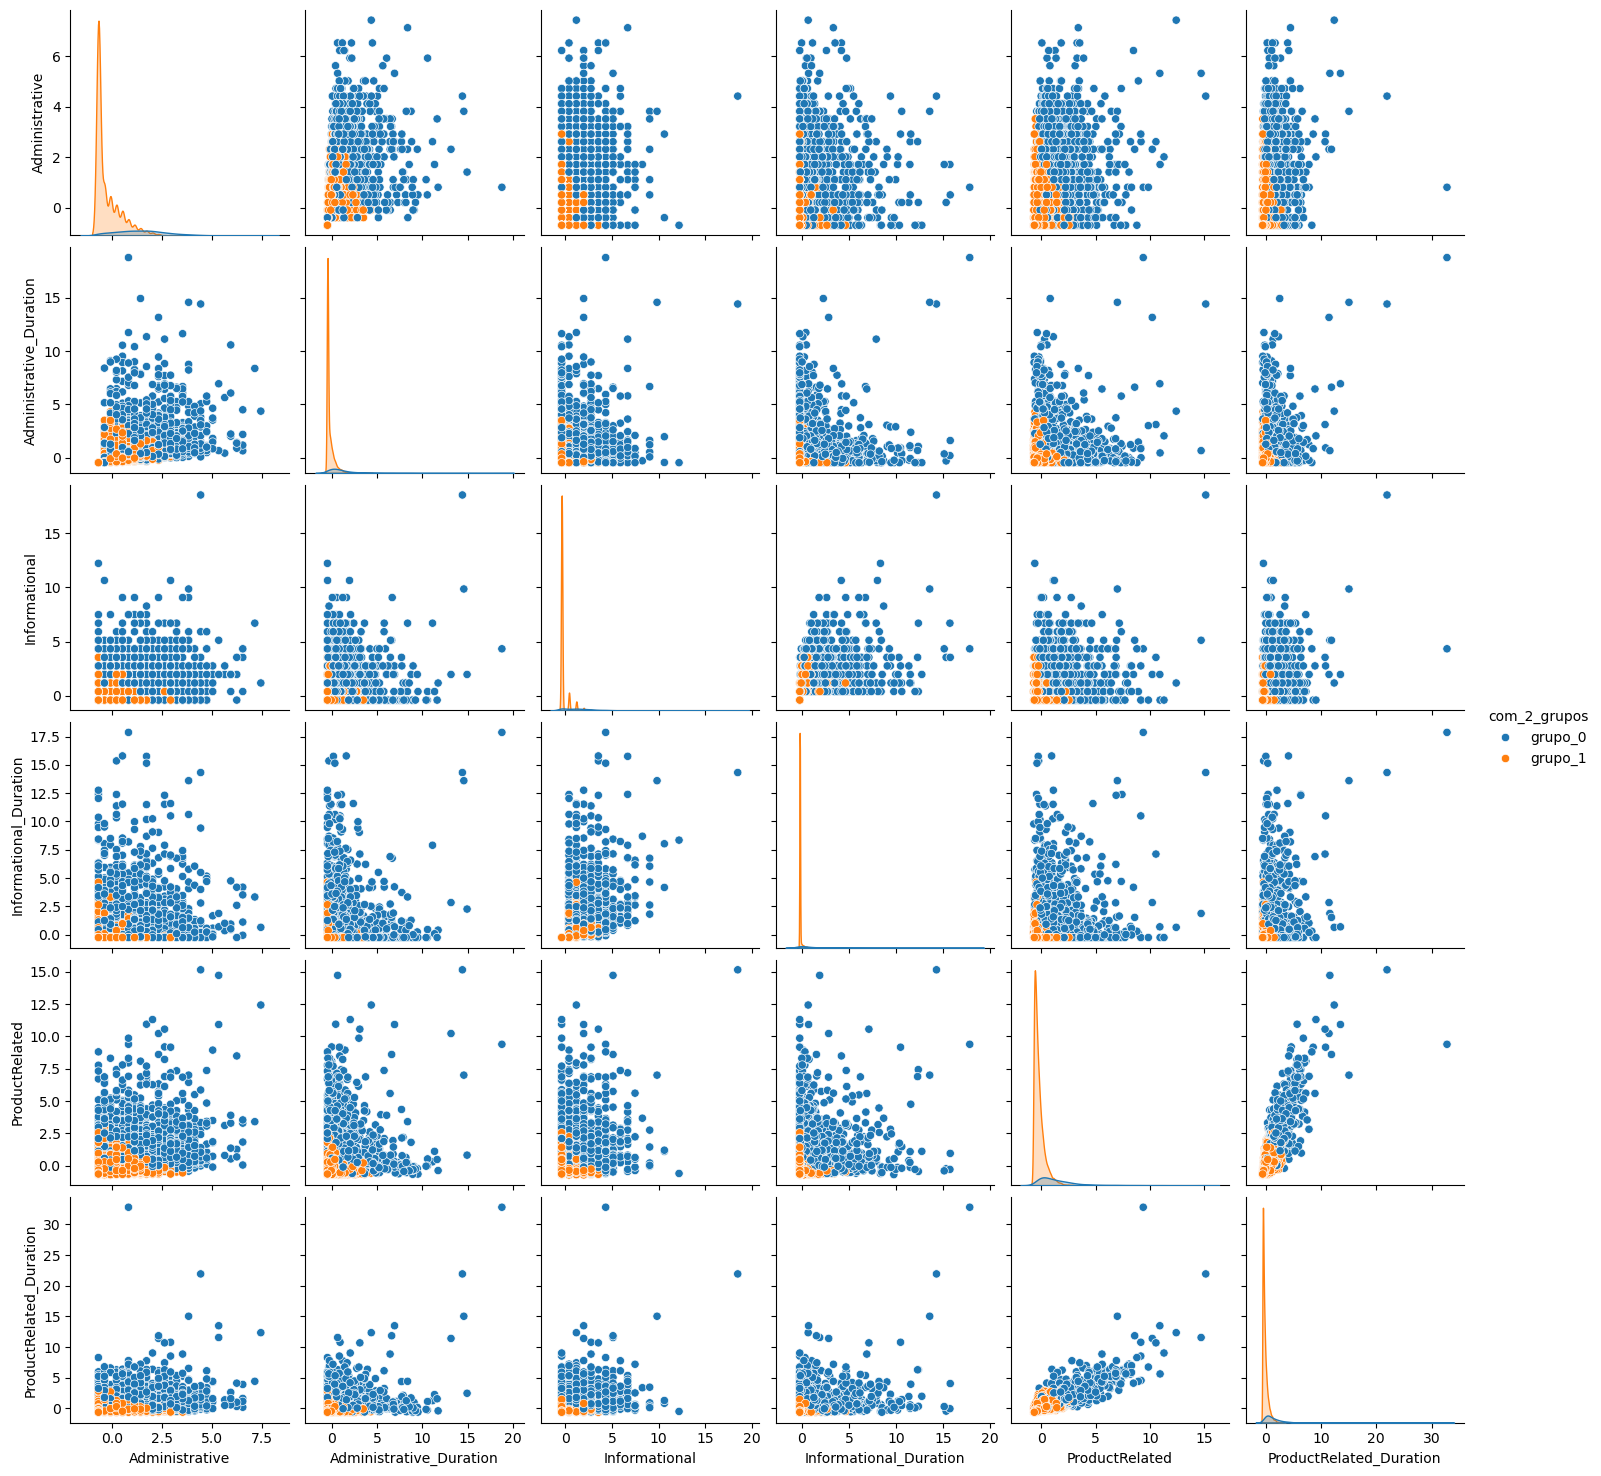

In [38]:
sns.pairplot(df_pad, hue='com_2_grupos')
plt.show()

##### Para n_clusters = 3

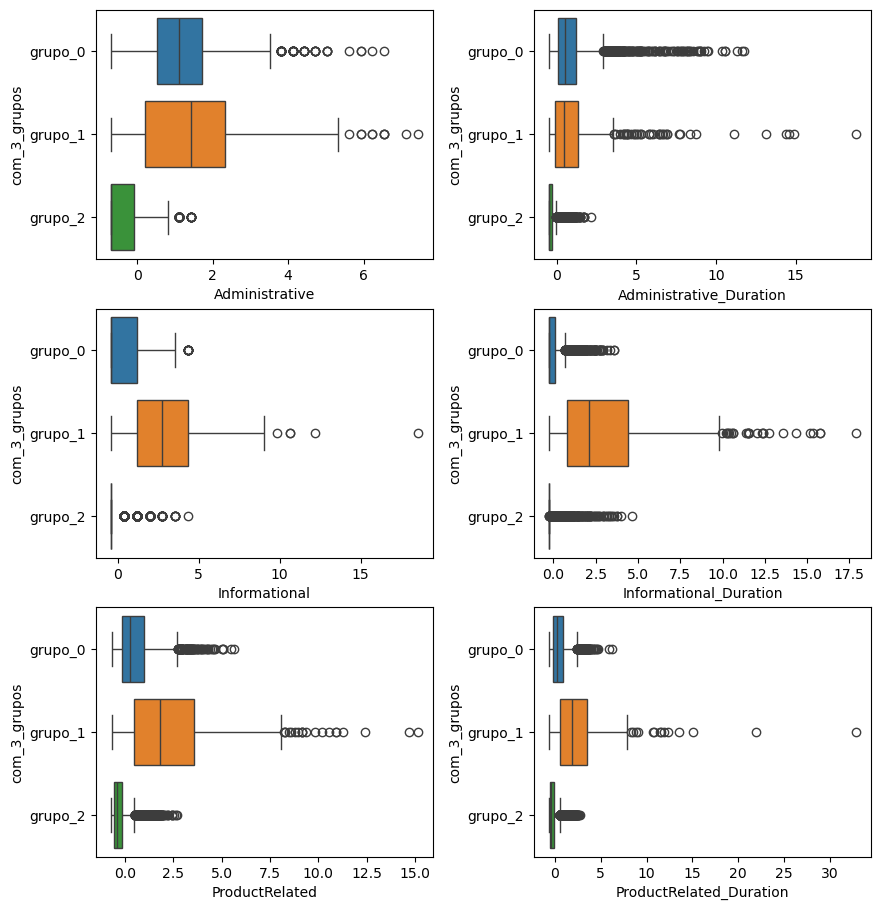

In [40]:
vars = list(df_pad.columns)

fig = plt.figure(figsize=[10, 11])

ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)

sns.boxplot(data=df_pad, x=vars[0], y='com_3_grupos', ax=ax1, hue='com_3_grupos')
sns.boxplot(data=df_pad, x=vars[1], y='com_3_grupos', ax=ax2, hue='com_3_grupos')
sns.boxplot(data=df_pad, x=vars[2], y='com_3_grupos', ax=ax3, hue='com_3_grupos')
sns.boxplot(data=df_pad, x=vars[3], y='com_3_grupos', ax=ax4, hue='com_3_grupos')
sns.boxplot(data=df_pad, x=vars[4], y='com_3_grupos', ax=ax5, hue='com_3_grupos')
sns.boxplot(data=df_pad, x=vars[5], y='com_3_grupos', ax=ax6, hue='com_3_grupos')

plt.subplots_adjust(wspace=.3)
plt.show()

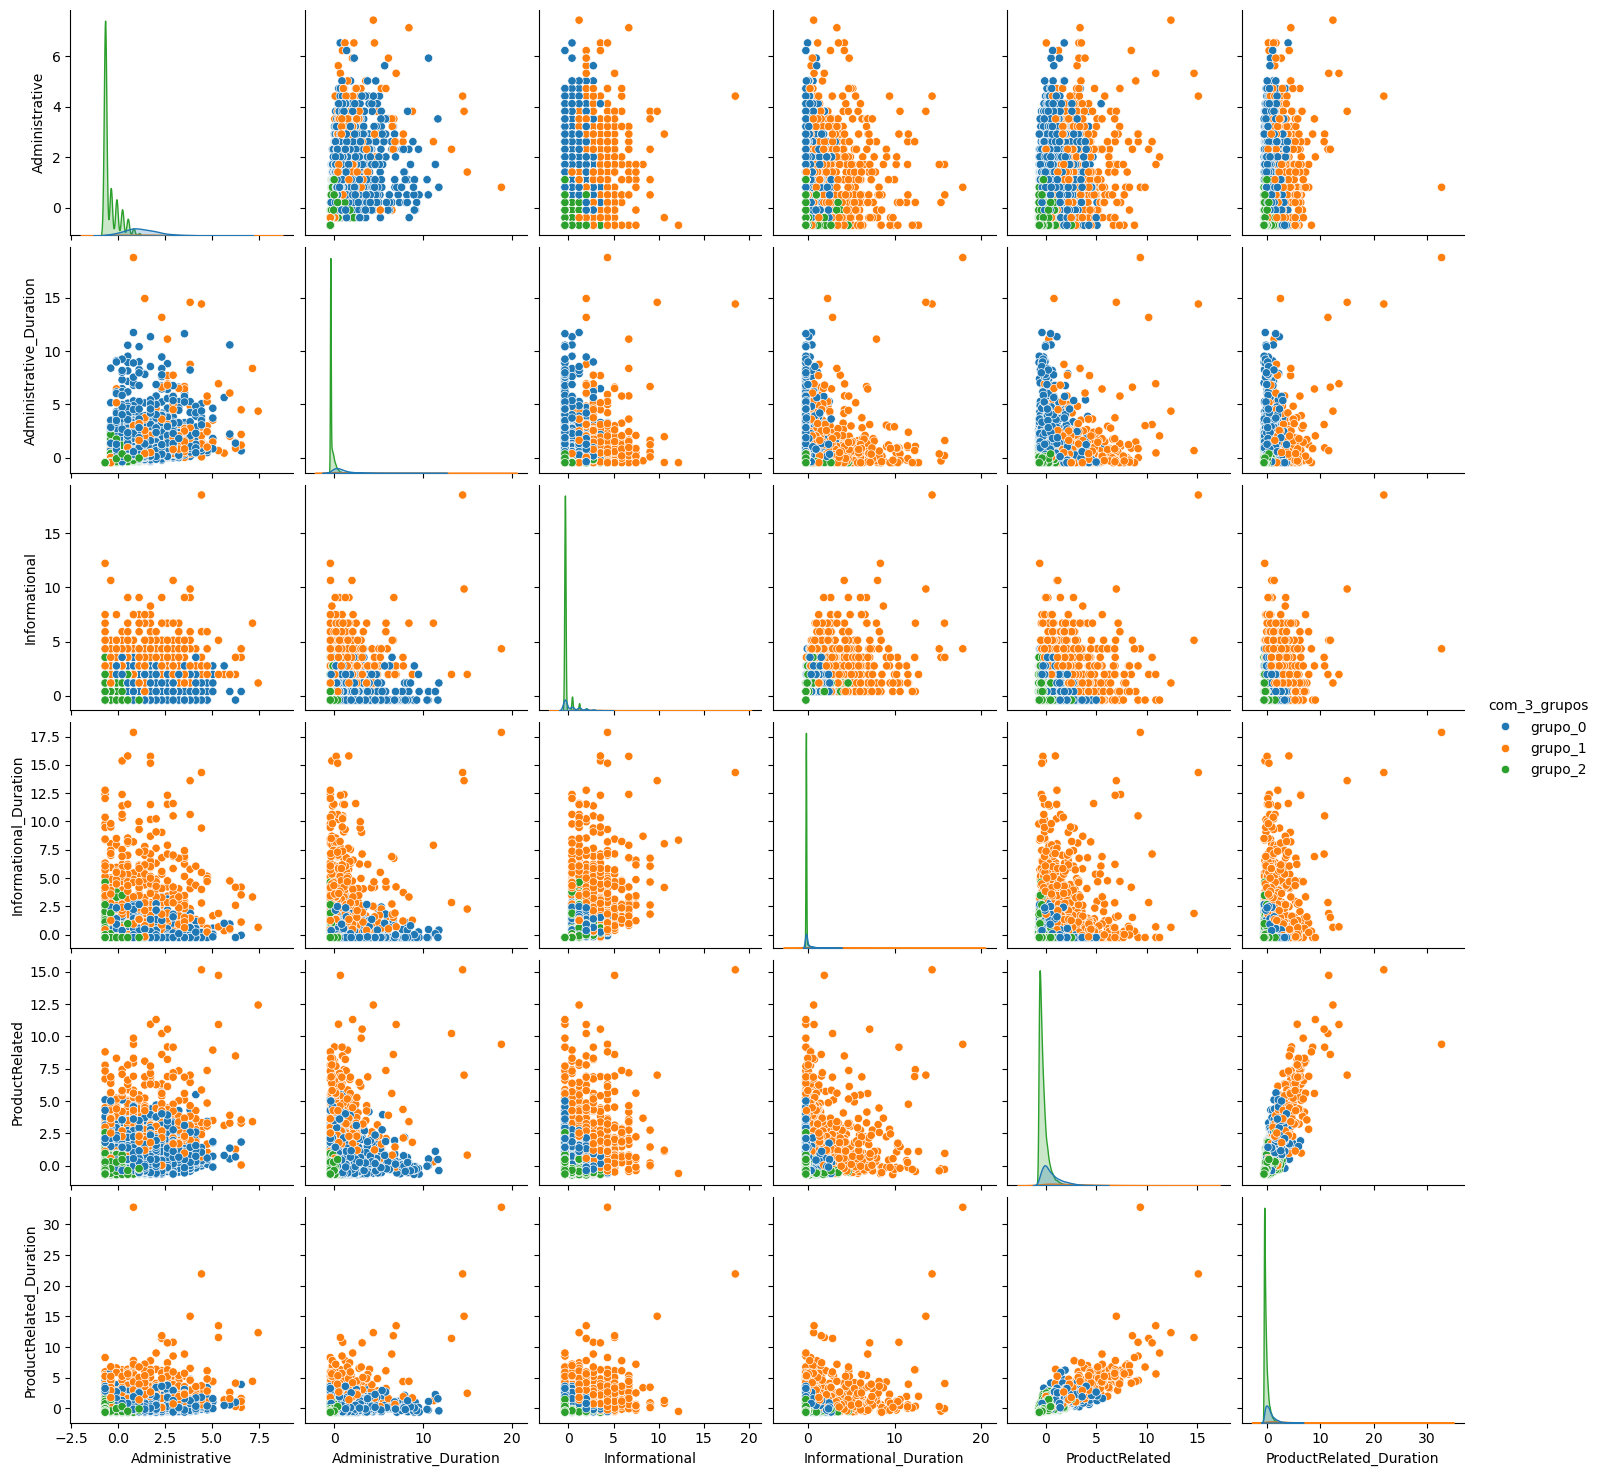

In [41]:
sns.pairplot(df_pad, hue='com_3_grupos')
plt.show()

##### Para n_clusters = 4

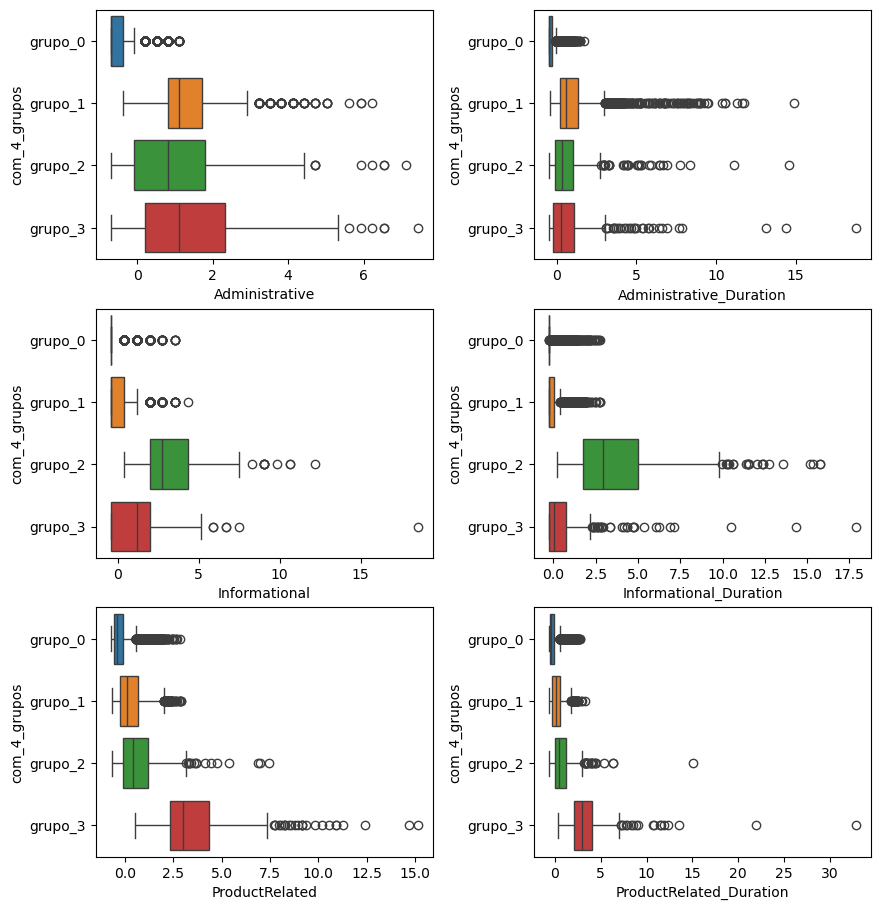

In [43]:
vars = list(df_pad.columns)

fig = plt.figure(figsize=[10, 11])

ax1 = fig.add_subplot(321)
ax2 = fig.add_subplot(322)
ax3 = fig.add_subplot(323)
ax4 = fig.add_subplot(324)
ax5 = fig.add_subplot(325)
ax6 = fig.add_subplot(326)

sns.boxplot(data=df_pad, x=vars[0], y='com_4_grupos', ax=ax1, hue='com_4_grupos')
sns.boxplot(data=df_pad, x=vars[1], y='com_4_grupos', ax=ax2, hue='com_4_grupos')
sns.boxplot(data=df_pad, x=vars[2], y='com_4_grupos', ax=ax3, hue='com_4_grupos')
sns.boxplot(data=df_pad, x=vars[3], y='com_4_grupos', ax=ax4, hue='com_4_grupos')
sns.boxplot(data=df_pad, x=vars[4], y='com_4_grupos', ax=ax5, hue='com_4_grupos')
sns.boxplot(data=df_pad, x=vars[5], y='com_4_grupos', ax=ax6, hue='com_4_grupos')

plt.subplots_adjust(wspace=.3)
plt.show()

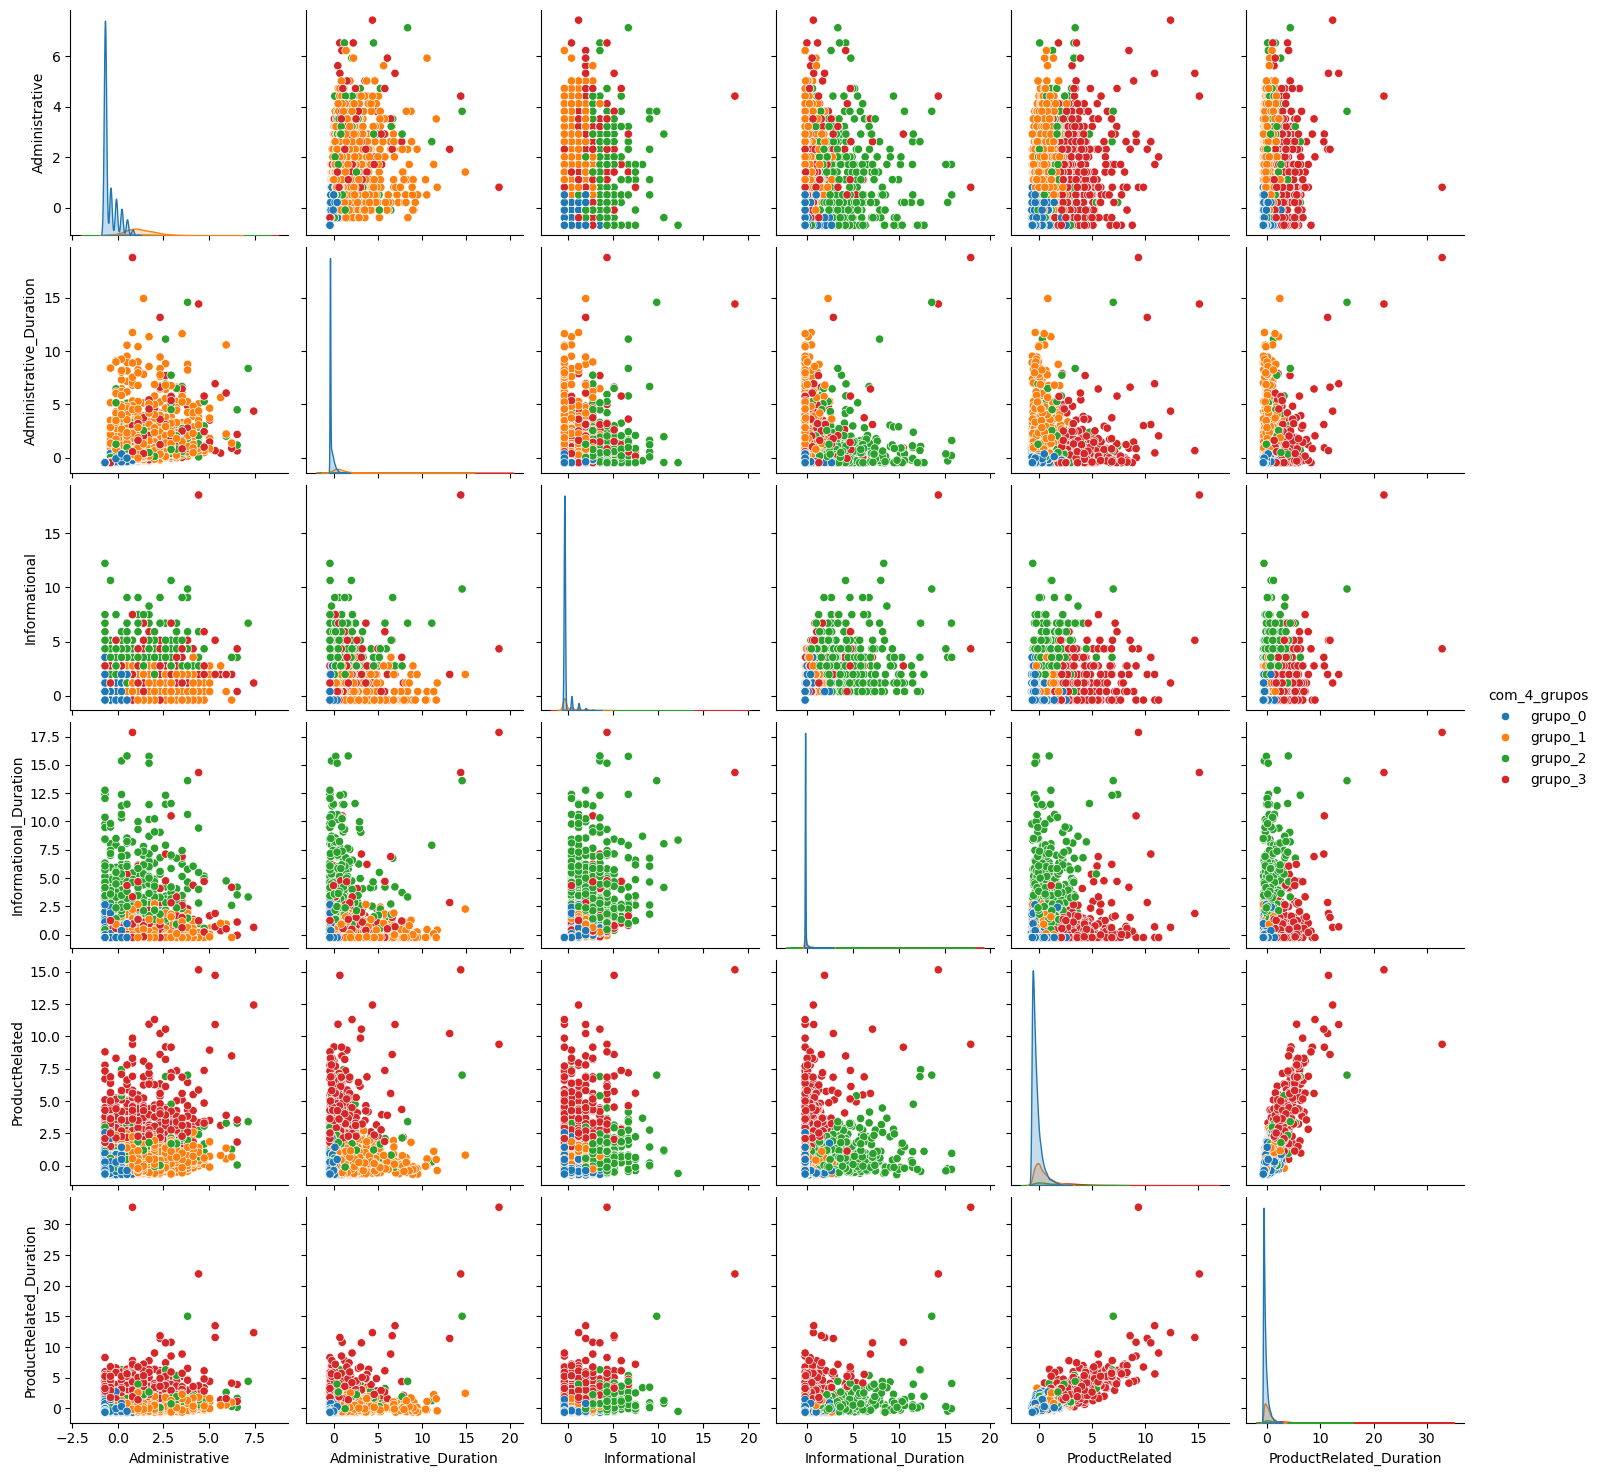

In [44]:
sns.pairplot(df_pad, hue='com_4_grupos')
plt.show()

Com base na análise o agrupamento em dois grupos aparenta exibir os melhores resultados, com dados mais bem definidos em cada um dos dois grupos, como pode ser visto pelo `pairplot` e pelos `boxplot`. Os agrupamentos com 3 e 4 grupos apresentam redundâncias em relação a algumas variáveis, mas apresentam boa separação dos dados para outras (isso pode ser visto por meio dos `boxplot`). Em função disso, vamos avaliar os três agrupamentos na avaliação abaixo.


## Avaliação de resultados

Avalie os grupos obtidos com relação às variáveis fora do escopo da análise (minimamente *bounce rate* e *revenue*). 
- Qual grupo possui clientes mais propensos à compra?

1. BounceRates -->	Percentual de visitantes que entram no site e saem sem acionar outros requests durante a sessão
2. Revenue --> Indica se houve compra ou não

In [218]:
# Adicionando ao dataFrame de interesse

df_pad['BounceRates'] = df_full[['BounceRates']]
df_pad['Revenue'] = df_full[['Revenue']]
df_pad.head()

Administrative  Administrative_Duration  Informational  \
0       -0.696993                -0.457191      -0.396478   
1       -0.696993                -0.457191      -0.396478   
2       -0.696993                -0.457191      -0.396478   
3       -0.696993                -0.457191      -0.396478   
4       -0.696993                -0.457191      -0.396478   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0               -0.244931       -0.691003                -0.624348   
1               -0.244931       -0.668518                -0.590903   
2               -0.244931       -0.691003                -0.624348   
3               -0.244931       -0.668518                -0.622954   
4               -0.244931       -0.488636                -0.296430   

  com_2_grupos com_3_grupos com_4_grupos com_5_grupos  ... com_8_grupos  \
0      grupo_1      grupo_2      grupo_0      grupo_0  ...      grupo_0   
1      grupo_1      grupo_2      grupo_0      grupo_0  ...      grupo_0   
2      grupo_1      grupo_2      grupo_0      grupo_0  ...      grupo_0   
3      grupo_1      grupo_2      grupo_0      grupo_0  ...      grupo_0   
4      grupo_1      grupo_2      grupo_0      grupo_0  ...      grupo_0   

  com_9_grupos com_10_grupos com_11_grupos com_12_grupos com_13_grupos  \
0      grupo_1       grupo_0       grupo_0      grupo_11       grupo_0   
1      grupo_1       grupo_0       grupo_0      grupo_11       grupo_0   
2      grupo_1       grupo_0       grupo_0      grupo_11       grupo_0   
3      grupo_1       grupo_0       grupo_0      grupo_11       grupo_0   
4      grupo_1       grupo_0       grupo_0      grupo_11       grupo_0   

  com_14_grupos com_15_grupos BounceRates Revenue  
0       grupo_1       grupo_9        0.20   False  
1       grupo_1       grupo_9        0.00   False  
2       grupo_1       grupo_9        0.20   False  
3       grupo_1       grupo_9        0.05   False  
4       grupo_1       grupo_9        0.02   False  

[5 rows x 22 columns]

Avaliando os agrupamentos em função das variáveis fora do escopo

In [239]:
agrupamentos = ['com_2_grupos', 'com_3_grupos', 'com_4_grupos']

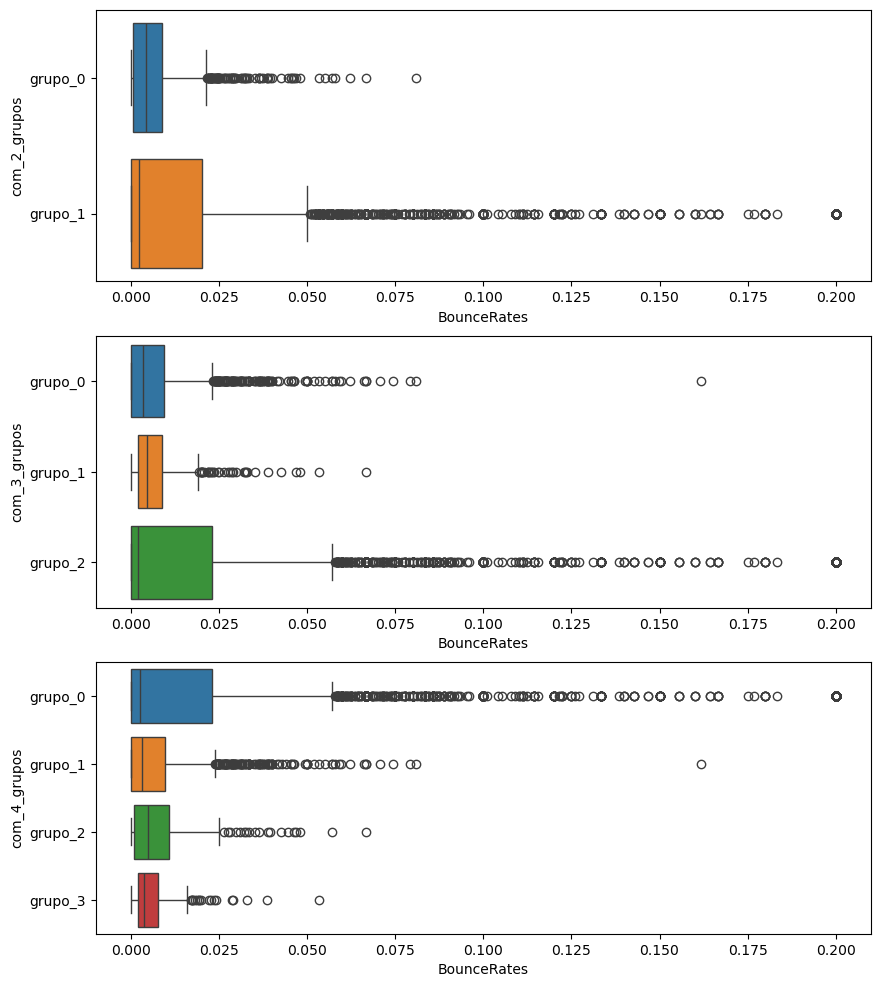

In [326]:
# Analise dos grupos em função do BounceRates

fig = plt.figure(figsize=[10,12])
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

ax1 = sns.boxplot(ax=ax1, data=df_pad, x='BounceRates', y='com_2_grupos', hue="com_2_grupos")
ax2 = sns.boxplot(ax=ax2, data=df_pad, x='BounceRates', y='com_3_grupos', hue="com_3_grupos")
ax3 = sns.boxplot(ax=ax3, data=df_pad, x='BounceRates', y='com_4_grupos', hue="com_4_grupos")

plt.show()

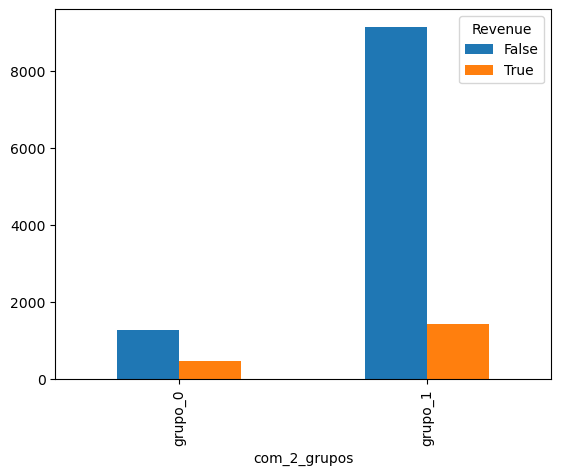

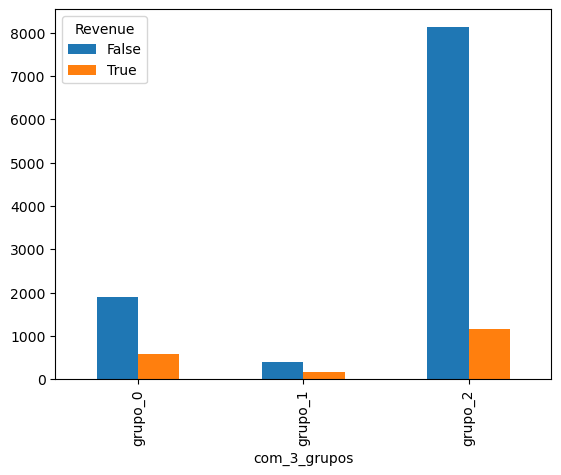

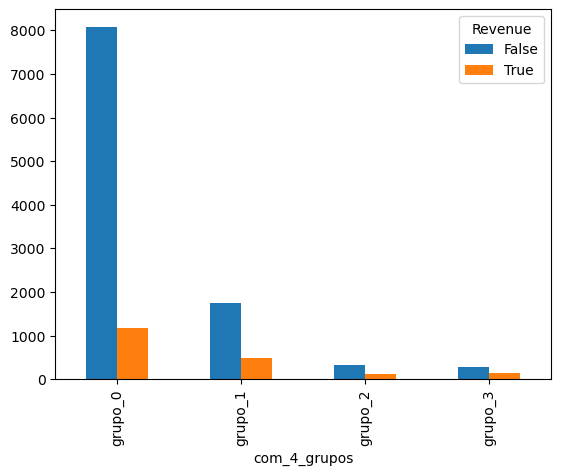

In [328]:
# Análise dos grupos em função do revenue
for _ in agrupamentos:
     df_pad.groupby([_ , 'Revenue'], observed=False)['Revenue'].count().unstack().plot.bar()
     plt.show()

##### Avaliando as proporções de revenue dentro dos agrupamentos

In [341]:
# Agrupamento com 2 grupos

pd.crosstab(df_pad.com_2_grupos, df_pad.Revenue, normalize='index') * 100

Revenue           False      True 
com_2_grupos                      
grupo_0       72.659817  27.340183
grupo_1       86.490830  13.509170

In [343]:
# Agrupamento com 3 grupos

pd.crosstab(df_pad.com_3_grupos, df_pad.Revenue, normalize='index') * 100

Revenue           False      True 
com_3_grupos                      
grupo_0       76.873228  23.126772
grupo_1       69.312169  30.687831
grupo_2       87.486550  12.513450

In [345]:
# Agrupamento com 4 grupos

pd.crosstab(df_pad.com_4_grupos, df_pad.Revenue, normalize='index') * 100

Revenue           False      True 
com_4_grupos                      
grupo_0       87.405324  12.594676
grupo_1       78.564982  21.435018
grupo_2       72.954545  27.045455
grupo_3       65.277778  34.722222

Com base nos três agrupamentos estudados, podemos afirmar que o grupo que possui uma maior proporção de clientes propensos à compra é o `grupo_3` do agrupamentos com 4 clusters (ou grupos), como pode ser visto nas tabelas acima. Vale destacar também que o `grupo_3` possui o menor percentual de visitantes que entram no site e saem sem acionar outros requests durante a sessão, como é apresentado pelo `boxplot` do agrupamento com 4 clusters.